# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features for PCA
features = ['release_year', 'duration']
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0]) * 60)
X = df[features]

# Standardize the features
X = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-1.186211,2.166089
1,0.270468,0.063416
2,0.048322,-0.521929
3,-0.137389,-0.659214
4,-0.738724,-0.219378


2. Create a scree plot for each principal component

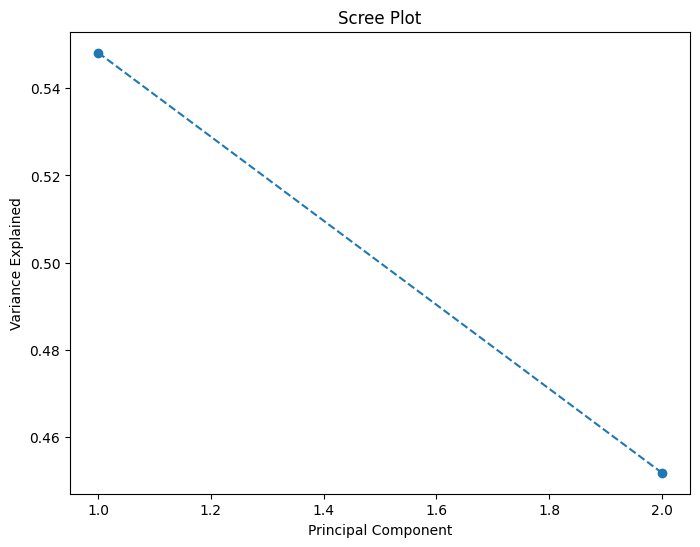

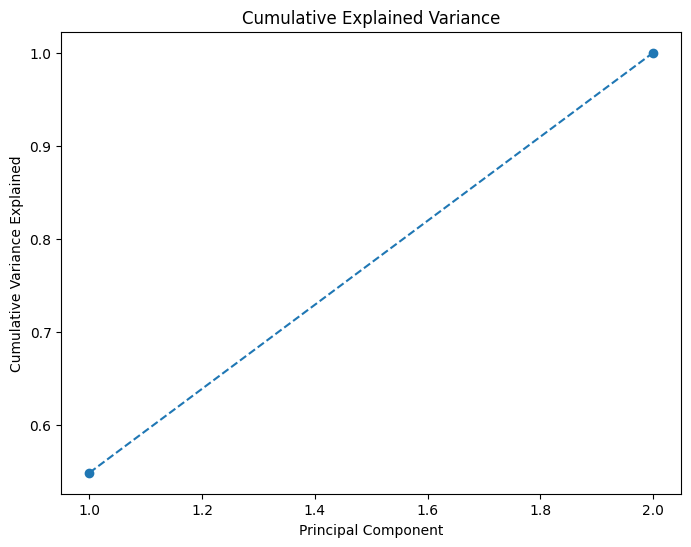

In [20]:
import matplotlib.pyplot as plt

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

3. Use any clustering algorithm to create clusters

In [21]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(principalDf)
principalDf['Cluster'] = clusters
principalDf.head()

,principal component 1,principal component 2,Cluster
0,-1.186211,2.166089,1
1,0.270468,0.063416,0
2,0.048322,-0.521929,0
3,-0.137389,-0.659214,2
4,-0.738724,-0.219378,2


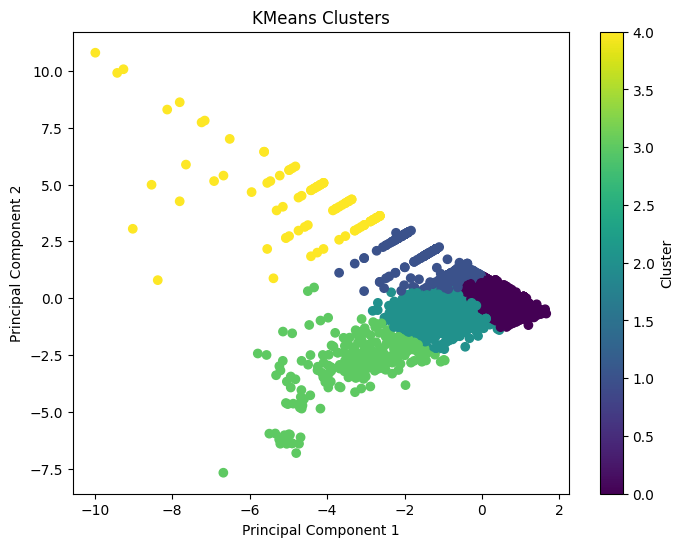

In [22]:
# Plot the KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['Cluster'], cmap='viridis')
plt.title('KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

4. Profile each cluster that you have generated based on your experiments

In [23]:
# Profile each cluster
cluster_profile = df.join(principalDf['Cluster'])
for cluster in cluster_profile['Cluster'].unique():
    print(f'Cluster {cluster}')
    display(cluster_profile[cluster_profile['Cluster'] == cluster].describe(include='all'))
    print('\n')

Cluster 1


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Cluster
count,482,482,482,175,464,460,479,482.000000,482,482.000000,482,482,482.0
unique,482,2,482,142,455,87,348,NaN,11,NaN,153,477,NaN
top,s1,TV Show,3%,S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",United States,"October 1, 2018",NaN,TV-MA,NaN,Kids' TV,A surly septuagenarian gets another chance at ...,NaN
freq,1,322,1,6,3,157,10,NaN,184,NaN,30,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.680498,NaN,197.690871,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.601454,NaN,47.650864,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.000000,NaN,142.000000,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,164.000000,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,180.000000,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,240.000000,NaN,NaN,1.0




Cluster 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Cluster
count,5822,5822,5822,3985,5161,5376,5820,5822.000000,5816,5822.000000,5822,5822,5822.0
unique,5822,2,5822,3289,4977,559,1450,NaN,14,NaN,398,5810,NaN
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",David Attenborough,United States,"October 1, 2018",NaN,TV-MA,NaN,Documentaries,Multiple women report their husbands as missin...,NaN
freq,1,3983,1,18,13,1859,41,NaN,2439,NaN,318,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.001031,NaN,85.869976,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.269507,NaN,25.778211,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,3.000000,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,60.000000,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,89.000000,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,106.000000,NaN,NaN,0.0




Cluster 2


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Cluster
count,1134,1134,1134,989,1112,1107,1132,1134.000000,1133,1134.000000,1134,1134,1134.0
unique,1134,2,1134,729,1104,153,331,NaN,12,NaN,190,1133,NaN
top,s4,Movie,9,David Dhawan,David Attenborough,United States,"January 1, 2020",NaN,TV-14,NaN,"Dramas, International Movies",A scheming matriarch plots to cut off her disa...,NaN
freq,1,993,1,6,5,370,78,NaN,291,NaN,70,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.382716,NaN,108.529982,NaN,NaN,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.110250,NaN,28.766315,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992.000000,NaN,25.000000,NaN,NaN,2.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,93.000000,NaN,NaN,2.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,107.000000,NaN,NaN,2.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,126.000000,NaN,NaN,2.0




Cluster 3


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Cluster
count,258,258,258,239,243,249,258,258.000000,258,258.000000,258,258,258.0
unique,258,2,258,179,238,42,82,NaN,11,NaN,89,258,NaN
top,s106,Movie,300 Miles to Heaven,Youssef Chahine,Sam Kinison,United States,"December 31, 2019",NaN,TV-14,NaN,"Classic Movies, Dramas, International Movies","Hoping to help their dissident parents, two br...",NaN
freq,1,241,1,9,3,109,27,NaN,88,NaN,15,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1977.620155,NaN,113.968992,NaN,NaN,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.598372,NaN,44.721349,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,18.000000,NaN,NaN,3.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973.000000,NaN,89.000000,NaN,NaN,3.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981.000000,NaN,104.000000,NaN,NaN,3.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.000000,NaN,137.000000,NaN,NaN,3.0




Cluster 4


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Cluster
count,91,91,91,10,89,88,88,91.000000,91,91.000000,91,91,91.0
unique,91,1,91,10,89,11,82,NaN,7,NaN,48,91,NaN
top,s469,TV Show,American Horror Story,James Bamford,"Evan Peters, Sarah Paulson, Jessica Lange, Den...",United States,"April 1, 2020",NaN,TV-14,NaN,TV Comedies,This twisted Emmy-winning drama plays upon the...,NaN
freq,1,91,1,1,1,60,2,NaN,39,NaN,9,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.560440,NaN,473.406593,NaN,NaN,4.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.890746,NaN,132.800768,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1967.000000,NaN,360.000000,NaN,NaN,4.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,360.000000,NaN,NaN,4.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,420.000000,NaN,NaN,4.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,540.000000,NaN,NaN,4.0


In [24]:
for cluster in cluster_profile['Cluster'].unique():
    print(f'\nEnhanced Profile for Cluster {cluster}:')
    print(cluster_profile[cluster_profile['Cluster'] == cluster]['type'].value_counts())  # Show distribution of movie/tv show
    print(cluster_profile[cluster_profile['Cluster'] == cluster]['rating'].value_counts())  # Show rating distribution
    # Add other columns as needed for further analysis.


Enhanced Profile for Cluster 1:
type
TV Show    322
Movie      160
Name: count, dtype: int64
rating
TV-MA    184
TV-14    157
TV-PG     44
TV-Y7     35
TV-Y      27
TV-G      16
R          9
PG-13      6
NR         2
NC-17      1
PG         1
Name: count, dtype: int64

Enhanced Profile for Cluster 0:
type
Movie      3983
TV Show    1839
Name: count, dtype: int64
rating
TV-MA       2439
TV-14       1356
TV-PG        619
R            422
TV-Y         239
TV-Y7        193
PG-13        180
TV-G         155
PG           132
NR            62
G             10
TV-Y7-FV       6
NC-17          2
UR             1
Name: count, dtype: int64

Enhanced Profile for Cluster 2:
type
Movie      993
TV Show    141
Name: count, dtype: int64
rating
TV-14    291
R        200
PG-13    184
TV-MA    174
TV-PG     97
PG        92
TV-Y7     34
G         18
TV-G      16
NR        12
TV-Y      12
UR         3
Name: count, dtype: int64

Enhanced Profile for Cluster 3:
type
Movie      241
TV Show     17
Name: count,